# Normalize Data

#### TOC
- [Provide Use Case Parameters](#Provide-Use-Case-Parameters)
- [Read DataFrame from the CSV file](#Read-DataFrame-from-the-CSV-file)
- [Function to normalize the data](#Function-to-normalize-the-data)
- [Write DataFrame to the CSV file](#Write-DataFrame-to-the-CSV-file)

# Read DataFrame from the CSV file

In [9]:
using DataFrames, CSV, Dates, Plots

file_name = "data/market_indicators.csv"
original_column   = 5  # original data
normalized_column = 6  # to be populated with normalized values

df = CSV.read(file_name)

# Show the values of the cololumn with the original data
show(df[:,original_column:normalized_column], allcols=true)

1623×2 DataFrame
│ Row  │ 5. GDP q/q │ 6. GDP q/q norm │
│      │ Float64    │ Float64?        │
├──────┼────────────┼─────────────────┤
│ 1    │ 0.062      │ 1.0             │
│ 2    │ 0.062      │ missing         │
│ 3    │ 0.062      │ missing         │
│ 4    │ 0.068      │ missing         │
│ 5    │ 0.068      │ missing         │
│ 6    │ 0.068      │ missing         │
│ 7    │ 0.023      │ missing         │
│ 8    │ 0.023      │ missing         │
│ 9    │ 0.023      │ missing         │
│ 10   │ 0.004      │ missing         │
⋮
│ 1613 │ 0.021      │ missing         │
│ 1614 │ 0.021      │ missing         │
│ 1615 │ 0.021      │ missing         │
│ 1616 │ 0.021      │ missing         │
│ 1617 │ 0.021      │ missing         │
│ 1618 │ 0.021      │ missing         │
│ 1619 │ 0.021      │ missing         │
│ 1620 │ 0.021      │ missing         │
│ 1621 │ 0.021      │ missing         │
│ 1622 │ 0.021      │ missing         │
│ 1623 │ 0.021      │ missing         │

# Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

In [10]:
function normalize(df, original_column, normalized_column)
    original = df[:, original_column]
    items = length(original) 
    
    min = minimum(original)
    max = maximum(original)   

    for i in 1:items
        value = (original[i] - min) / (max - min) # normalization formula 0.0 to 1.0
        #value = value * 100                    # 0.0 to 100
        value = value * 200                    # 0.0 to 200
        value = value - 100                    # -100 to 100
        value = round(value, digits=2)         # 0.00 
        df[i, normalized_column] = value
    end
    return df[:, normalized_column]
end

data_normalized = normalize(df, original_column, normalized_column)

1623-element SentinelArrays.SentinelArray{Float64,1,Float64,Missing,Array{Float64,1}}:
  21.35
  21.35
  21.35
  25.84
  25.84
  25.84
  -7.87
  -7.87
  -7.87
 -22.1
 -22.1
 -22.1
 -65.54
   ⋮
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36
  -9.36

# Condense Date to e.g. Mar'48 on x-axis

- Since multiple rows share one year, using just year makes a choppy graph.
- Since days of the month are missing and are are not evenly spaced, it is bad idea to use them.
- Since we have all the months they make for acceptable values on the x-axis.
- In the future, I might create more granual scale.

In [18]:
dates = df[:,2] # e.g. 1948-03-31
columns = length(dates)
periods = Array{String, 1}(undef, columns) # define array to hold x-axis values

for i in 1:columns
    periods[i] = string( Dates.format(dates[i], "u'yy")  ) # e.g. Mar'48
end
periods

1623-element Array{String,1}:
 "Mar'48"
 "Apr'48"
 "May'48"
 "Jun'48"
 "Jul'48"
 "Aug'48"
 "Sep'48"
 "Oct'48"
 "Nov'48"
 "Dec'48"
 "Jan'49"
 "Feb'49"
 "Mar'49"
 ⋮
 "Sep'19"
 "Oct'19"
 "Oct'19"
 "Nov'19"
 "Nov'19"
 "Dec'19"
 "Dec'19"
 "Jan'20"
 "Jan'20"
 "Feb'20"
 "Feb'20"
 "Mar'20"

# Draw plots

If the normalization above was done right, the plots retain exactly same shape, regardless that y-axis (vertical) is scaled.

- https://docs.juliaplots.org/latest/layouts/

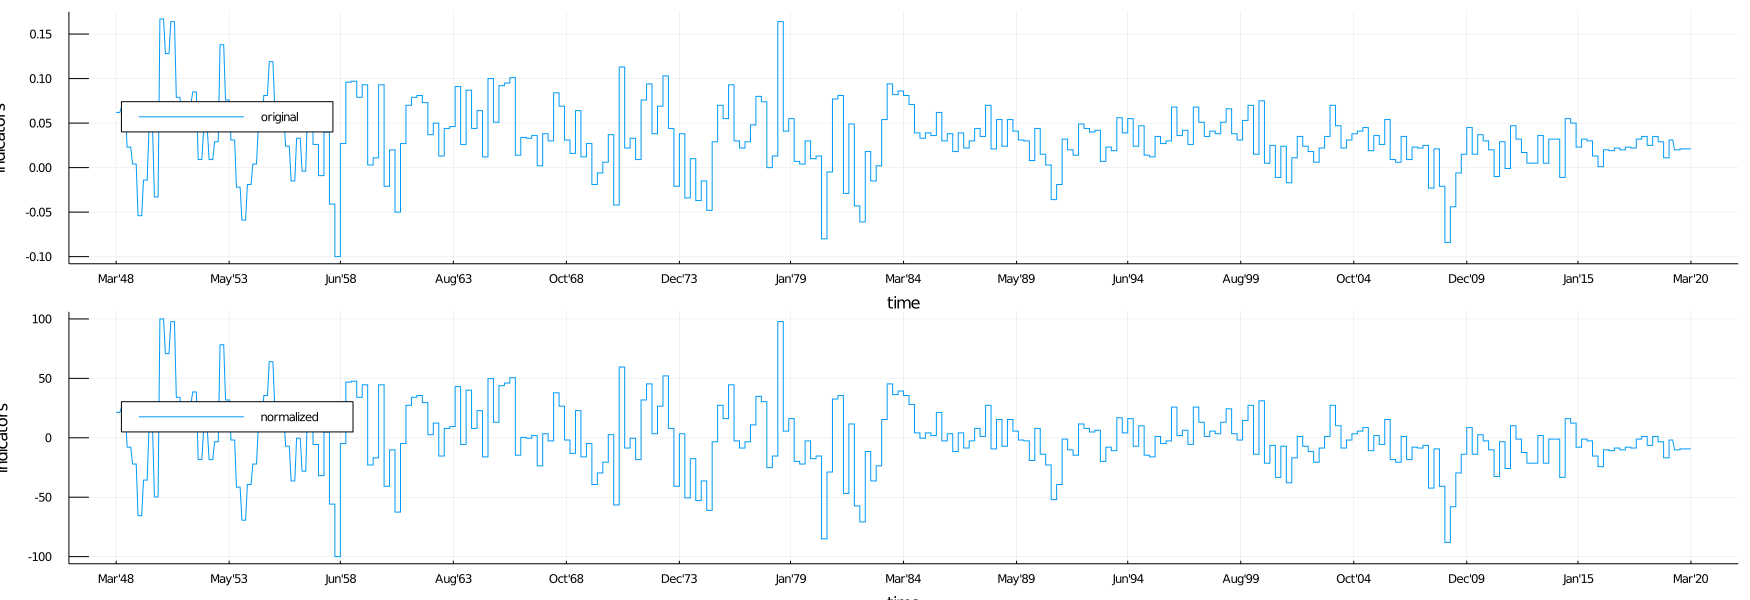

In [21]:
gr()
plot(periods, 
    [df[:,original_column]  df[:,normalized_column]  ], 
    label    = ["original" "normalized"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (2, 1)
    )

# Write DataFrame to the CSV file

In [22]:
CSV.write(file_name, df, delim=',', header=true)

"data/market_indicators.csv"

In [23]:
show(df[:,original_column:normalized_column], allcols=true)

1623×2 DataFrame
│ Row  │ 5. GDP q/q │ 6. GDP q/q norm │
│      │ Float64    │ Float64?        │
├──────┼────────────┼─────────────────┤
│ 1    │ 0.062      │ 21.35           │
│ 2    │ 0.062      │ 21.35           │
│ 3    │ 0.062      │ 21.35           │
│ 4    │ 0.068      │ 25.84           │
│ 5    │ 0.068      │ 25.84           │
│ 6    │ 0.068      │ 25.84           │
│ 7    │ 0.023      │ -7.87           │
│ 8    │ 0.023      │ -7.87           │
│ 9    │ 0.023      │ -7.87           │
│ 10   │ 0.004      │ -22.1           │
⋮
│ 1613 │ 0.021      │ -9.36           │
│ 1614 │ 0.021      │ -9.36           │
│ 1615 │ 0.021      │ -9.36           │
│ 1616 │ 0.021      │ -9.36           │
│ 1617 │ 0.021      │ -9.36           │
│ 1618 │ 0.021      │ -9.36           │
│ 1619 │ 0.021      │ -9.36           │
│ 1620 │ 0.021      │ -9.36           │
│ 1621 │ 0.021      │ -9.36           │
│ 1622 │ 0.021      │ -9.36           │
│ 1623 │ 0.021      │ -9.36           │

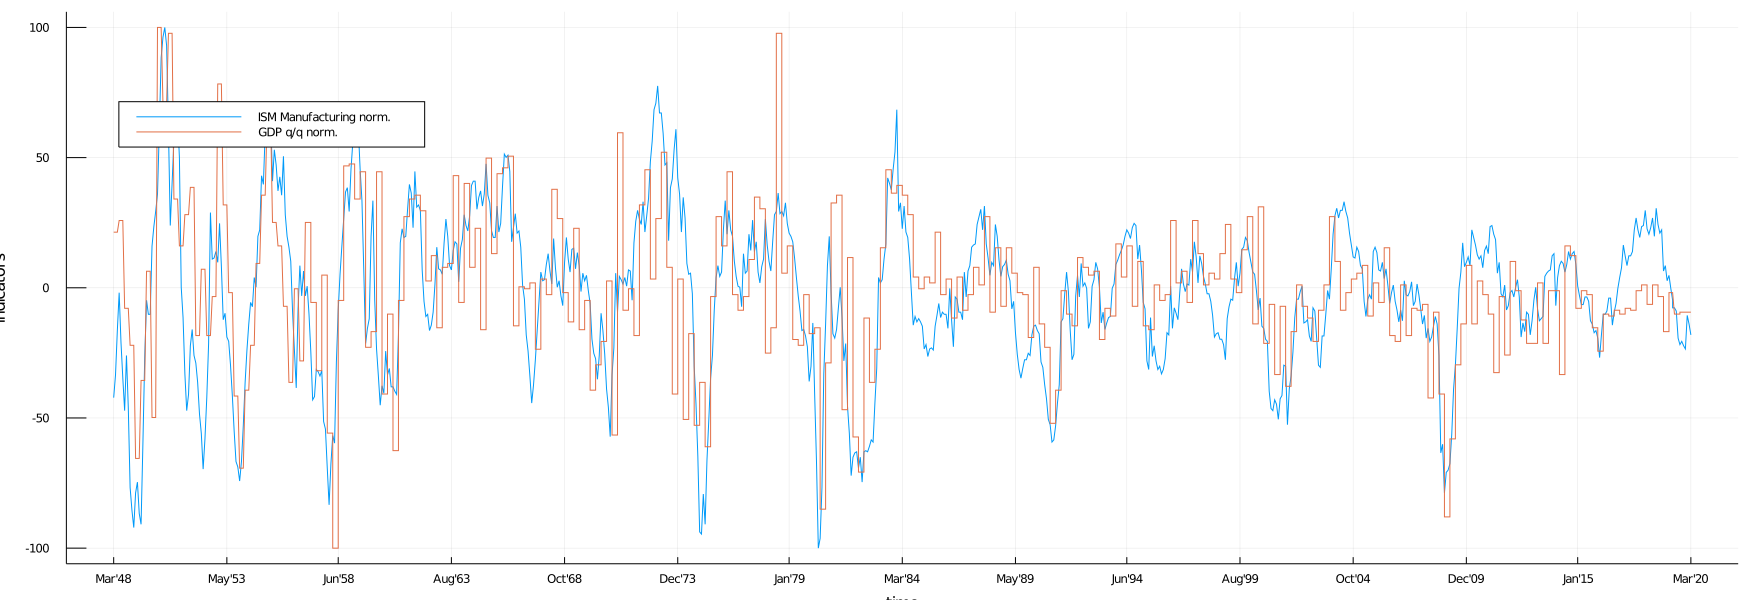

In [26]:
data1 = df[:,4] # Manufacturing
data2 = df[:,6]

gr()
plot(periods, 
    [ data1  data2 ], 
    label    = ["ISM Manufacturing norm." "GDP q/q norm."],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (1, 1)
    )